In [36]:
# import
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
df= pd.read_csv('/Users/emiliocastrolagunas/Desktop/Sem4/BI/Notebooks/Data/diabetes.csv')

In [17]:
#checking for null-values
df.isnull().sum()
#0 null-values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
#idea of general looks of data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [20]:
#as the parameter DiabetesPedigreeFunction is such a long typing process a variable is instanciated instead
DPF='DiabetesPedigreeFunction'

In [21]:
#Making a median of some of the parameters, as there's some 0-values (not null values!) and replacing them in the dataframe
median_blood_pressure = df[df['BloodPressure'] != 0]['BloodPressure'].median()

df['BloodPressure'] = df['BloodPressure'].replace(0, median_blood_pressure)

median_BMI = df[df['BMI'] != 0]['BMI'].median()

df['BMI'] = df['BMI'].replace(0, median_BMI)

median_insulin = df[df['Insulin'] != 0]['Insulin'].median()

df['Insulin'] = df['Insulin'].replace(0, median_insulin)

median_glucose = df[df['Glucose'] != 0]['Glucose'].median()

df['Glucose'] = df['Glucose'].replace(0, median_glucose)

median_skin_thickness = df[df['SkinThickness'] != 0]['SkinThickness'].median()

df['SkinThickness'] = df['SkinThickness'].replace(0, median_skin_thickness)




# Task 2: Implementing Decision Tree and Naïve Bayes Models

In [22]:
# Split the data into features and target variable
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = df[feature_cols]
y = df['Outcome']


In [23]:
#Which is better?
#from sklearn.preprocessing import StandardScaler
#sTool = StandardScaler()
#X_scaled = sTool.fit_transform(X)


In [24]:
#X_scaled

In [25]:
X_standardized=(X-X.mean())/X.std()

In [26]:
#X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=123)

# Decision Tree

In [29]:
# Split the dataset into into training and testing sets in proportion 8:2 
#   80% of it as training data
#   20% as a validation dataset
set_prop = 0.2

In [30]:
#  Initialize seed parameter for the random number generator used for the split
seed = 7

In [31]:
# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [32]:
# Build Decision Trees Classifier 
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(**params)
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)
 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [41]:
# draw tree from the trained data by graphviz package
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=df.columns[:8], class_names = True,        
                         filled=True, rounded=True, proportion = False,
                         special_characters=True)  
graph = graphviz.Source(dot_data) 

In [42]:
# result saved in file heart
graph.render("tmp") 

'tmp.pdf'

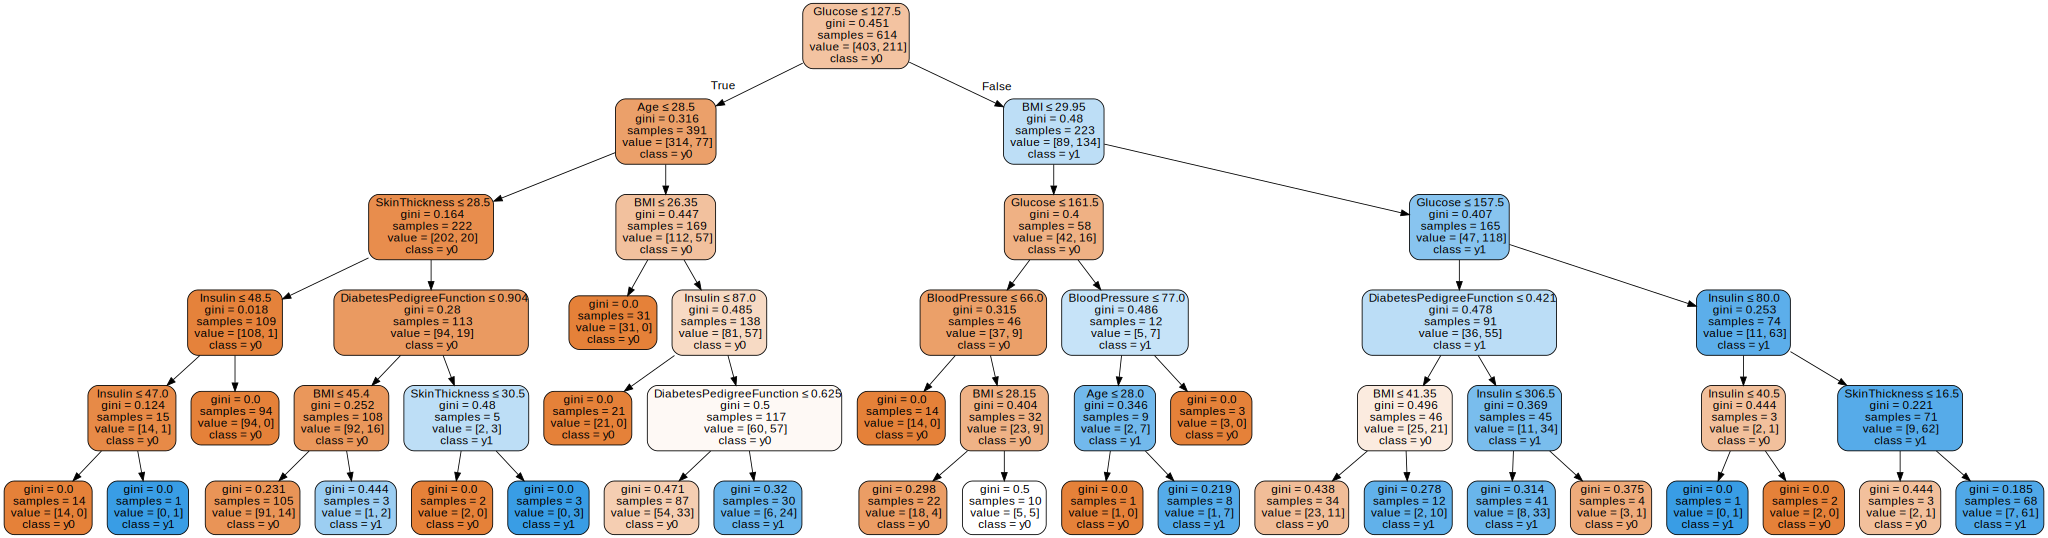

In [43]:
# show it here
graph 

In [44]:
# Predict on the test data
dt_predictions = dt_classifier.predict(X_test)

# Calculate the accuracy of the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Accuracy: 0.63


# Task 3: Appropriate Methods and Measures


In [46]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)
y_testp

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [47]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[89,  8],
       [25, 32]])

In [49]:
confusion = pd.crosstab(y_test,y_testp)
confusion

col_0,0,1
Outcome,,
0,89,8
1,25,32


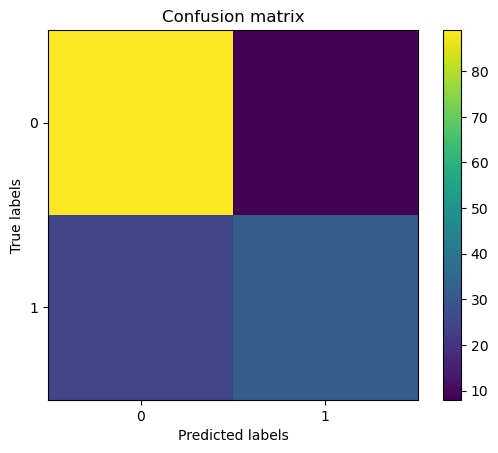

In [52]:
# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

<Axes: >

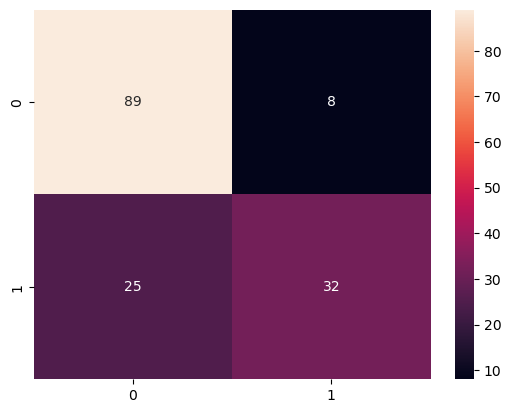

In [53]:
import seaborn as sns
sns.heatmap(confusion_mat, annot=True)